In [2]:
import qiskit as q
%matplotlib inline

In [3]:
circuit =q.QuantumCircuit(2,2)

In [4]:
# 0 0
circuit.x(0)#not the first qbit
# 1 0
circuit.cx(0,1)#controlled not : not bit two if bit 1 is high
# 1 1


In [5]:
circuit.measure([0,1],[0,1])
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c_0: ═══════════╩══╬═
                   ║ 
c_1: ══════════════╩═

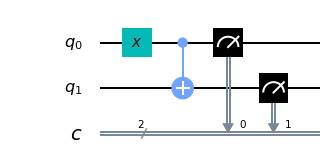

In [6]:
circuit.draw(output='mpl')

In [7]:
from qiskit import IBMQ
IBMQ.save_account("9d24b516f406a0157cc5e1d92d84f851f029a8dcf576f0ea5d7d5f39b8e189fb0fedce9e1fc276f81a85d9b7821f6cd48ca63e7146093327e681f46a8d394568")

configrc.store_credentials:WARNING:2020-05-19 01:57:57,398: Credentials already present. Set overwrite=True to overwrite.


In [8]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [15]:
provider = IBMQ.get_provider("ibm-q")
#to check the backend providers for queues
for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count ="simulated"
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")
            

ibmq_qasm_simulator has 1 queued and simulated qubits
ibmqx2 has 4 queued and 5 qubits
ibmq_16_melbourne has 21 queued and 15 qubits
ibmq_vigo has 7 queued and 5 qubits
ibmq_ourense has 2 queued and 5 qubits
ibmq_london has 1 queued and 5 qubits
ibmq_burlington has 1 queued and 5 qubits
ibmq_essex has 3 queued and 5 qubits
ibmq_armonk has 0 queued and 1 qubits
ibmq_rome has 2 queued and 5 qubits


In [16]:
from qiskit.tools.monitor import job_monitor
backend = provider.get_backend("ibmq_london")
job = q.execute(circuit,backend=backend, shots=1000)
job_monitor(job)

Job Status: job has successfully run


In [17]:
from qiskit.visualization import plot_histogram
from matplotlib import style
style.use("dark_background")


In [18]:
result=job.result()
counts = result.get_counts(circuit)

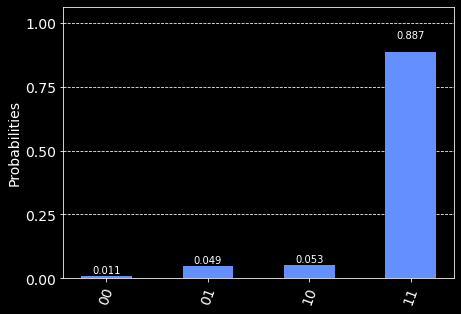

In [19]:
plot_histogram([counts])